# $Zillow$ $Project$ $Final$ $Report$

# **Goals:**

* Discover key attributes that influence home value.
   * Carefully select attributes that will avoid data leakage.
* Use those attributes to develop a machine learning model to predict home value.

  


## Imports

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import wrangle as w
import model as m
import explore as e


import warnings
warnings.filterwarnings("ignore")

# Acquire:

In [2]:
# acquire telco data 
df = w.get_zillow_data()

* Data acquire from Codeup Database 11/17/22

* It contained  52441 rows and 10 columns before cleaning

* Each row represents a single family household:
    * properties from 2017 with current transactions
    * located in the Californian counties of 'Los Angeles' or 'Orange'or 'Ventura'

* Each column represents a feature related to the single family residential.

# Prepare:

prepare actions:
* After the follwing steps I retained 95.9% of original data:
    * Outliers were removed
    (to better fit the definition of Single Family Property):
    
        * Beds above 6 
        * Baths above 6 
        * Home values above 1_750_000
        * Rows with both 0 beds and 0 baths 
        
    * For the following features it was assumed null values meant the structure did not exist on property:
        * fireplace (45198)
        * deck (52052)
        * pool (41345)
        * garage (34425)
            
    * The following null values were dropped:
        * home_value (1)
        * squarefeet (82)
        * yearbuilt (116)

* Encoded categorical variables
* Split data into train, validate and test 
    * Approximately: train 56%, validate 24%, test 20%
  


###                                                        <h1><center>Data Dictionary</center></h1>     


|Feature          | Description|
| :---------------: | :---------------------------------- |
| home_value (target) | The total tax assessed value of the parcel  |
| squarefeet:  | Calculated total finished living area of the home |
| bathrooms:   |  Number of bathrooms in home including fractional bathrooms |
| bedrooms: | Number of bedrooms in home  |
| yearbuilt:  |  The Year the principal residence was built   |
| fireplace: | fireplace on property (if any = 1) |
| deck:  | deck on property (if any = 1) |
| pool:  | pool on property (if any = 1) |
| garage: | garage on property (if any = 1) |
| county: | FIPS code for californian counties: 6111 Ventura County, 6059  Orange County, 6037 Los Angeles County |
| home_age: | The age of the home in 2017   |
|optional_features: |If a home has any of the follwing: fireplace, deck, pool, garage it is noted as 1   |
|additional features: | 	Encoded and values for categorical data

In [3]:
# prepare data 
df = w.zillow_prep(df)

In [4]:
# split data: train, validate and test
train, validate, test = w.split_data(df)

# Looking at the data

In [5]:
train.head(10)

,home_value,squarefeet,bathrooms,bedrooms,yearbuilt,fireplace,deck,pool,garage,county,home_age,optional_features,los_angeles_county,orange_county,ventura_county
32899,346258.0,1026.0,1.0,2.0,1924.0,0.0,0.0,0.0,0.0,6037.0,93.0,0,1,0,0
4511,520000.0,1728.0,2.0,3.0,1987.0,0.0,0.0,0.0,0.0,6037.0,30.0,0,1,0,0
29470,217589.0,1840.0,2.0,4.0,1973.0,0.0,0.0,0.0,1.0,6059.0,44.0,0,0,1,0
15398,210507.0,2581.0,3.0,4.0,1994.0,0.0,0.0,1.0,0.0,6037.0,23.0,1,1,0,0
14156,294263.0,902.0,2.0,2.0,1950.0,0.0,0.0,0.0,0.0,6037.0,67.0,0,1,0,0
32788,241475.0,1719.0,2.5,3.0,1992.0,1.0,0.0,0.0,1.0,6111.0,25.0,1,0,0,1
19187,108271.0,2018.0,3.0,3.0,1960.0,0.0,0.0,1.0,0.0,6037.0,57.0,1,1,0,0
29240,243917.0,2542.0,3.0,3.0,1955.0,0.0,0.0,0.0,0.0,6037.0,62.0,0,1,0,0
24385,482506.0,1668.0,2.0,3.0,1979.0,0.0,0.0,1.0,1.0,6059.0,38.0,1,0,1,0
46165,413000.0,1351.0,2.0,3.0,1954.0,0.0,0.0,0.0,0.0,6037.0,63.0,0,1,0,0


# Data Summary

In [6]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
home_value,28159.0,435017.576015,332865.944266,3254.0,187537.5,362951.0,583900.5,1750000.0
squarefeet,28159.0,1832.225576,803.292556,300.0,1256.0,1633.0,2227.0,8251.0
bathrooms,28159.0,2.228506,0.884596,1.0,2.0,2.0,3.0,6.0
bedrooms,28159.0,3.273483,0.886781,1.0,3.0,3.0,4.0,6.0
yearbuilt,28159.0,1963.118719,22.663952,1878.0,1950.0,1960.0,1978.0,2015.0
fireplace,28159.0,0.141376,0.348415,0.0,0.0,0.0,0.0,1.0
deck,28159.0,0.006925,0.082929,0.0,0.0,0.0,0.0,1.0
pool,28159.0,0.204020,0.402991,0.0,0.0,0.0,0.0,1.0
garage,28159.0,0.344259,0.475135,0.0,0.0,0.0,1.0,1.0
county,28159.0,6049.246031,21.220257,6037.0,6037.0,6037.0,6059.0,6111.0


# Explore:

## How do optional home features such as fireplace, garage, pool and deck influence home value?

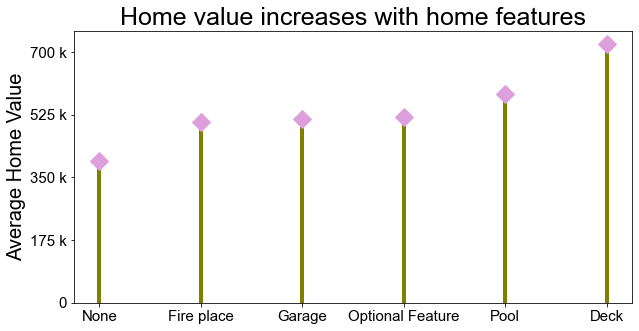

In [7]:
# obtain lolipop plot
e.get_loliplot(train)

#### Homes with a deck have a higher  home value on average than any other feature. Homes that have none  have the the lowest average home value.

I will now conduct a T-test to test for **a significant difference between the mean home value of homes with  optional features (such as: garage, fireplace,pool,deck) is greater than the mean home value  of homes with no optional features**

* The confidence interval is 95%
* Alpha is set to 0.05
* p/2 value will be compared to alpha


$H_0$: Mean home value of homes with optional featues <= mean home value of homes with no optional features 

$H_a$: Mean home value of homes with optional featues > mean home value of homes with no optional features 

In [8]:
e.get_ttest_optionalfeature(train)

t-stat 28.8315
p-value 0.0


The p-value/2 is less than the alpha. **There is evidence to support that homes that have at least one of the following feature: garage, fireplace, pool,deck on average have a higher home value.** Based on this statistical finding I believe that optional features is a driver of home value.Adding an encoded version of this feature to the model will likely increase the model ability to predict home value.

# Does more house equal more home value?


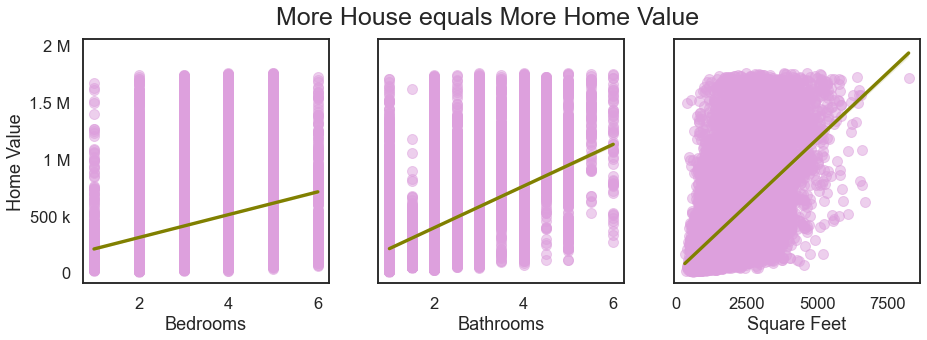

In [9]:
# obtain bed, bath and squarfeet graph
e.get_regplot_more_house(train)

#### It clear that more bedrooms , more bathrooms and more square feet space drives the home value up.

 # Does county location make a difference in home value?
   FIPS     6111: Ventura County    6059: Orange County    6037: Los Angeles County

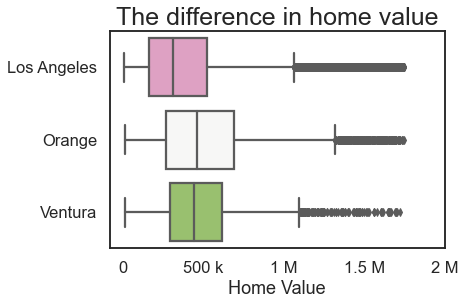

In [10]:
# obtain counties and home value box_plot
e.get_boxplot_county_vs_homevalue(train)

* **It seems that different counties have a diffirent home value mean.** Orange county homes have a slightly larger mean home value. Los Angeles county homes have the lowest mean home value.

**I will now conduct an anova test to test for a significant differences between the mean of the three different counties**

* The confidence interval is 95%
* Alpha is set to 0.05
* p value will be compared to alpha


$H_0$: There is  two or more counties that have the same home value mean. 

$H_a$: Mean home value of the 3 diffirent counties is not the same

In [11]:
# obtain anova test for county vs home_value
e.get_anovatest_county_vs_homevalue(train)

t-stat 391.4815270923903
p-value 2.0078897820183972e-168


The p-value is less than alpha. **There is evidence to support that the three counties have diffirent home value mean.** Based on this statistical finding I believe that county location is a driver of home value. Adding an encoded version of this feature to the model will likely improve the model ability to predict home value.

# Is home age a driver of home value?

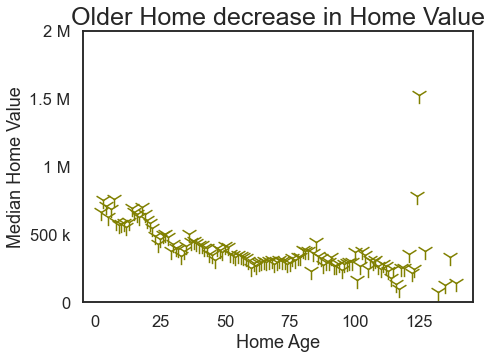

In [12]:
# obtain home age vs home value scatterplot
e.home_scatterplot(train)

* **It seems that there is a relationship between home age and median home value.** The older the home the lower the median age; there are exeptions to this observation.

**I will now conduct pearsonr test to test for a relationship  between the median home value and home age.**

* The confidence interval is 95%
* Alpha is set to 0.05
* p value will be compared to alpha

$H_0$: There is **no linear correlation** between the median home value and home age.

$H_a$: There **is a linear relationship** between the median home value and home age



In [13]:
# obtrain pearsonr test for home_value vs home_age
e.get_pearsonr_homevalue_vs_homeage(train)

correlation -0.24472152550019294
p-value 0.0


The p-value is less than alpha. There is **evidence to support that there is a relationship between home value and home age.** While it is a weak-negative relatiohsip I believe that adding it to my model will help improve the models ability to predict.

# Exploration Summary

* Homes with a deck feature are among the highest valued homes.
* Homes with one or more optional features(fireplace, pool, deck, garage) have a higher home value than homes with no optional features.
* The county location of the a home is a driver of home value.
* Home value has a correlation with home age.

# Features that will be included in my model

* All features selected seem to have and influence or correlation to home value
* **Square feet**  (scaled) 
* **Bathrooms**  (scaled)
* **Bedrooms** (scaled)
* **Home Age** (scaled)
* **County**  (encoded)
* **optional_features** (encoded)


# Features that will be not included in my model

* **yearbuilt** - redundant information since it is used to calculate home age.
* **'Fire place','Garage','Pool','Deck'** - the information will be included in the model through optional_features.

# Modeling:

* Since the  Home Value is not normaly distributed I will use **median as a baseline** set at $340,572.

* $R^2$ is the primary metric I will use to evaluate models and secondary will be a favorable $RMSE$. 
* $R^2$ helps understand how well the model fits the data.

* I will evaluate the following top models on train and validate:
        * Polynomial Regression degree 2
        * Polynomial Regression degree 2 with interactions only
        * Polynomial Regression degree 3
        * Polynomial Regression degree 4
* The model that performs the best on validate data will be run with test data.

In [14]:
# prepare data for modeling
X_train, y_train, X_validate, y_validate, X_test, y_test = m.model_data_prep(train, validate, test)

In [15]:
# run predictions on train data for models
train_pred, validate_pred, test_pred = m.predictions(X_train,y_train,X_validate,y_validate,X_test, y_test)



# Comparing Top Models on train and Validate 

### * Baseline Median Home Value                                                            $340,572

In [16]:
m.metrics(train_pred,y_train, validate_pred, y_validate)


,model,train_RMSE,train_R2,val_RMSE,val_R2
0,actual,0.0,1.0,0.0,1.0
1,baseline_median,340572.0,0.0,333213.0,0.0
2,poly_d2,264335.0,0.369357,257373.0,0.38237
3,Ipoly_d2,264575.0,0.368207,257777.0,0.380303
4,poly_d3,260512.0,0.387463,255389.0,0.391662
5,poly_d4,258806.0,0.395458,256378.0,0.387044


All models outperformed median baseline in terms of RMSE in both train and validate data.

Polynomial Regressor degree 4 did best in train data in both RMSE and $R^2$

The model with the best $R^2$ and RMSE in validate data is Polynomial Regressor degree 3.

**I will select model Polynomial Regressor degree 3 since it has the highest R2 and a least RMSE to other models on validate**

# Model on Test data

In [17]:
# get metrics on Final Model
m.metric_test(test_pred[['poly_d3','baseline_median']],y_test)

,model,test_RMSE,test_R2
0,poly_d3,256202.0,0.370163
1,baseline_median,329841.0,0.0


## Modeling Summary

* All models performed better than the baseline
* The Final Model Polynomial Regressor degree 3 had an $R^2$ or .37 on test data and had a better RMSE than baseline by $73,639.

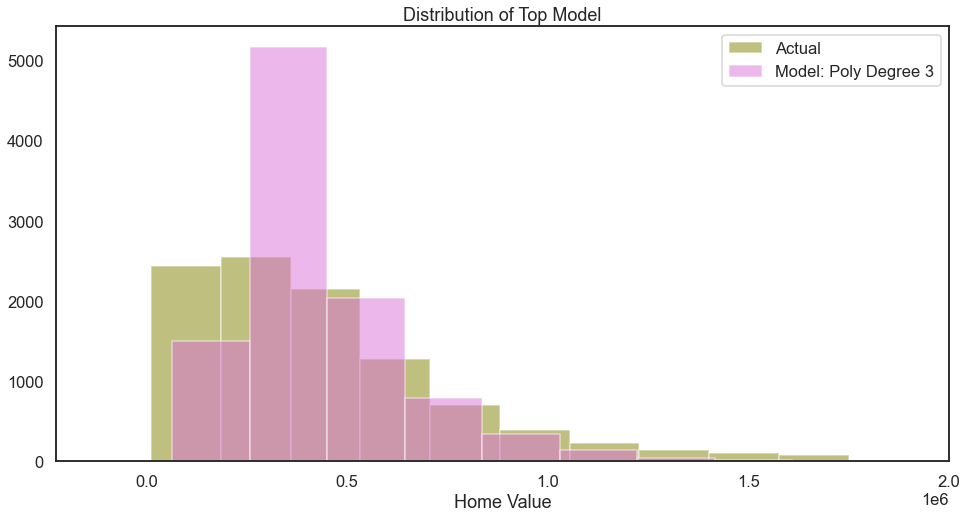

In [19]:
e.distribution_top_model(y_test, test_pred)   


# Conclusion

## Exploration



* Homes with an optional feature such as deck, pools, garage, fireplace have more value.
* Home with more bedrooms and bathrooms tend to have more value on average.
* County location make a difference in home value.
* Home age has a relationship with home value.

## Modeling

**The final model has an $R^2$ of 0.37 and performed  better than the median baseline by $ 73,639 RMSE** 


## Recommendations

* Standardize methods of data collection to increase data accuracy; this will likely improve models ability to predict future home values.

## Next Steps

* Look into locations of homes with information about neighborhoods and/or longitute and latitute to explore relationships between location and home value.
* Explore if lot size has and influence on home value.
